In [653]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [654]:
df = pd.read_csv('amazonextractionlaptop.csv')
df

Unnamed: 0 Company            TypeName  rating  Inches  \
0              0   Apple           Ultrabook     4.3    13.3   
1              1   Apple           Ultrabook     4.3    13.3   
2              2      HP            Notebook     4.3    15.6   
3              3   Apple           Ultrabook     3.9    15.4   
4              4   Apple           Ultrabook     4.2    13.3   
...          ...     ...                 ...     ...     ...   
1298        1298  Lenovo  2 in 1 Convertible     4.3    14.0   
1299        1299  Lenovo  2 in 1 Convertible     3.9    13.3   
1300        1300  Lenovo            Notebook     4.2    14.0   
1301        1301      HP            Notebook     4.3    15.6   
1302        1302    Asus            Notebook     4.4    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300                                    1366x768   
1301                                    1366x768   
1302                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight        Price  
0     Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1           Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2            Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3               AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4     Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg   33992.6400  
1299         Intel HD Graphics 520  Windows 10   1.3kg   79866.7200  
1300             Intel HD Graphics  Windows 10   1.5kg   12201.1200  
1301            AMD Radeon R5 M330  Windows 10  2.19kg   40705.9200  
1302             Intel HD Graphics  Windows 10   2.2kg   19660.3200  

[1303 rows x 13 columns]

In [655]:
df.isna().sum()

Unnamed: 0           0
Company              0
TypeName             0
rating              88
Inches               0
ScreenResolution    11
Cpu                  0
Ram                  0
Memory               0
Gpu                  1
OpSys                0
Weight               0
Price                0
dtype: int64

In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   rating            1215 non-null   float64
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1292 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1302 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [657]:
df.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
rating              float64
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [658]:
# remove gb and kg from Ram and weight and convert the cols to numeric
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df['Weight'].str.replace("kg", "")
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [659]:
df.drop('Unnamed: 0',axis = 1, inplace = True) # Drop this column as it is not neccessary
df.head()

Company   TypeName  rating  Inches                    ScreenResolution  \
0   Apple  Ultrabook     4.3    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook     4.3    13.3                            1440x900   
2      HP   Notebook     4.3    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook     3.9    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook     4.2    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232  
2         Intel HD Graphics 620  No OS    1.86   30636.0000  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080

In [660]:
df['Company'].value_counts() # To see how many company of laptops are there in this dataset

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

This dataset contains many laptop company but we need only five company namely apple,acer,dell,lenovo and HP.So we are choosing only this five company

In [661]:
df2 = df[df['Company'].str.contains('Asus|Huawei|LG|Chuwi|Fujitsu|Xiaomi|Xiaomi|Vero|Razer|Microsoft|Mediacom|Samsung|Toshiba|MSI|Google')==False]
df2['Company'].value_counts() #Created a new dataframe that contains only 5 company datasets

Dell      297
Lenovo    297
HP        274
Acer      103
Apple      21
Name: Company, dtype: int64

In [662]:
df2.head()

Company   TypeName  rating  Inches                    ScreenResolution  \
0   Apple  Ultrabook     4.3    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook     4.3    13.3                            1440x900   
2      HP   Notebook     4.3    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook     3.9    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook     4.2    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232  
2         Intel HD Graphics 620  No OS    1.86   30636.0000  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080

In [663]:
df2.shape

(992, 12)

In [664]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 1301
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           992 non-null    object 
 1   TypeName          992 non-null    object 
 2   rating            950 non-null    float64
 3   Inches            992 non-null    float64
 4   ScreenResolution  991 non-null    object 
 5   Cpu               992 non-null    object 
 6   Ram               992 non-null    int32  
 7   Memory            992 non-null    object 
 8   Gpu               992 non-null    object 
 9   OpSys             992 non-null    object 
 10  Weight            992 non-null    float32
 11  Price             992 non-null    float64
dtypes: float32(1), float64(3), int32(1), object(7)
memory usage: 93.0+ KB


In [665]:
df2.duplicated().sum()

5

In [666]:
df2.drop_duplicates(subset = None,keep='first',inplace = True)
df2.duplicated().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_2220\3484255936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset = None,keep='first',inplace = True)


0

In [667]:
df2.isna().sum()

Company              0
TypeName             0
rating              42
Inches               0
ScreenResolution     1
Cpu                  0
Ram                  0
Memory               0
Gpu                  0
OpSys                0
Weight               0
Price                0
dtype: int64

In [668]:
df2.shape

(987, 12)

In [669]:
df2.dropna(axis = 0,inplace = True)
df2.isna().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_2220\3818319778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis = 0,inplace = True)


Company             0
TypeName            0
rating              0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [670]:
df2.shape

(944, 12)

### EDA of Laptop Price Prediction Dataset

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


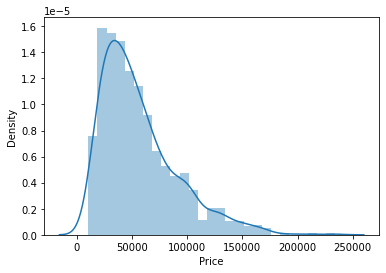

In [671]:
# Distribution of target column
sns.distplot(df2['Price'])
plt.show()

The distribution of target variable is skewed and its obvious that laptops with low prices are sold more than those costing high.

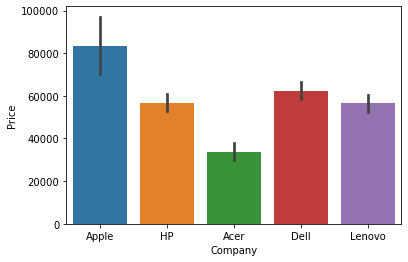

In [672]:
# Company column(To see the average price of each laptop brand)
sns.barplot(x=df2['Company'],y=df2['Price'])
# plt.xticks(rotation='vertical')
plt.show()

From the graph Apple is the most expensive laptop.

<AxesSubplot:>

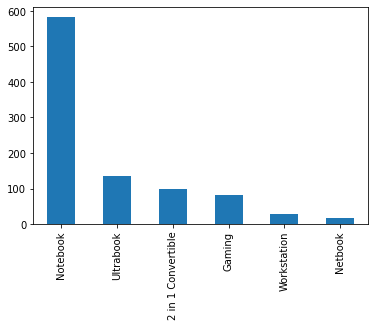

In [673]:
# Type of laptop(to see whats different type of  laptop are there)

df2['TypeName'].value_counts().plot(kind='bar')


The graph shows how many number of laptops are there in each types of laptops.

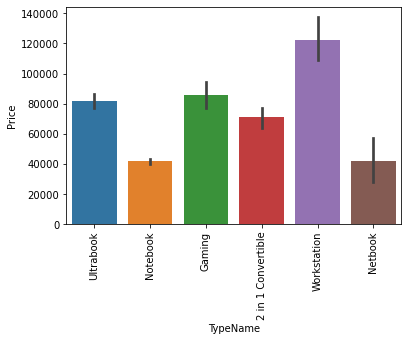

In [674]:
# To show the price for each laptop types
sns.barplot(x=df2['TypeName'], y=df2['Price'])
plt.xticks(rotation="vertical")
plt.show()

The workstation cost the most.
Notebook and Netbook cost the least.

<AxesSubplot:xlabel='Inches', ylabel='Price'>

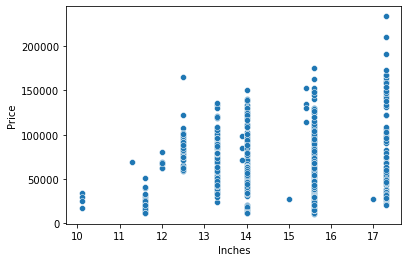

In [675]:
# To see whether the price vary with laptop size (inches)
sns.scatterplot(x = df2['Inches'],y=df2['Price'])

From the plot we can conclude that there is relationship between the price and size but not a strong relationship.

<AxesSubplot:>

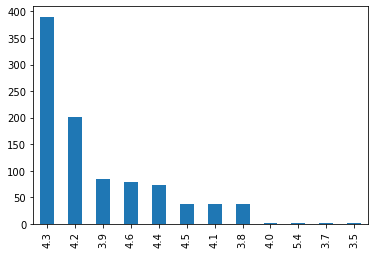

In [676]:
# checking numbre of diffrenet rating
df2['rating'].value_counts().plot(kind='bar')

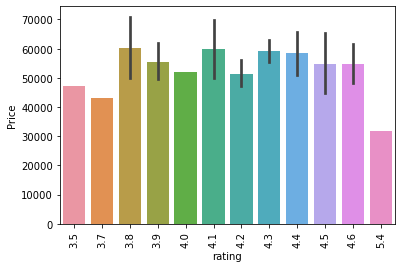

In [677]:
# To show the rating again price
sns.barplot(x=df2['rating'], y=df2['Price'])
plt.xticks(rotation="vertical")
plt.show()

So we can conclude that for the price above 50000 the rating is between 3.8 to 4.6.

### Feature Engineering

In [678]:
df2['ScreenResolution'].value_counts()

Full HD 1920x1080                                347
1366x768                                         214
IPS Panel Full HD 1920x1080                      166
IPS Panel Full HD / Touchscreen 1920x1080         41
Full HD / Touchscreen 1920x1080                   34
1600x900                                          22
Quad HD+ / Touchscreen 3200x1800                  14
Touchscreen 1366x768                              13
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      9
IPS Panel 4K Ultra HD 3840x2160                    7
4K Ultra HD / Touchscreen 3840x2160                7
Touchscreen 2560x1440                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
IPS Panel 1366x768                                 6
IPS Panel Retina Display 2560x1600                 5
1440x900                                           4
IPS Panel Touchscreen 1920x1200                    4
IPS Panel 2560x1440                           

Our ScreenResolution column contains a lot of information.
The ScreenResolution column gives information related to the presence of an IPS panel, are a laptop touch screen or not, and the X-axis and Y-axis screen resolution. So, we will extract the column into 3 new columns in the dataset.


C:\Users\user\AppData\Local\Temp\ipykernel_2220\3136887835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Touchscreen'] = df2['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


<AxesSubplot:>

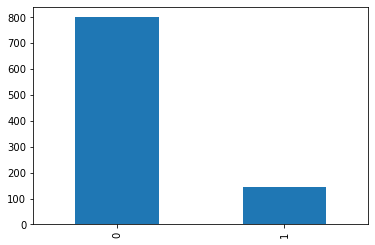

In [679]:
# 1)Extract Touch screen information
# Touch screen column can be encoded as 0 and 1 as it is binary variable. 1 means the laptop is a touch screen and 0 indicates not a touch screen.
df2['Touchscreen'] = df2['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

#how many laptops in df2 are touchscreen
df2['Touchscreen'].value_counts().plot(kind = 'bar')

Many laptops doesnt have touch screen and only few laptops have touchscreen

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

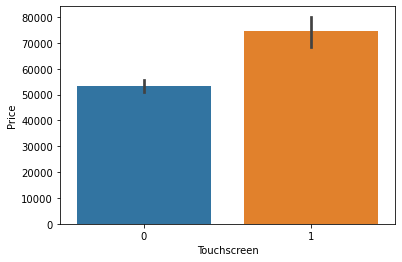

In [680]:
# plotting Touchscreen against price
sns.barplot(x=df2['Touchscreen'],y=df2['Price'])

When we plot Touchscreen against the price we can conclude that the laptops with touch screens are expensive.

C:\Users\user\AppData\Local\Temp\ipykernel_2220\1716143989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Ips'] = df2['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)


<AxesSubplot:>

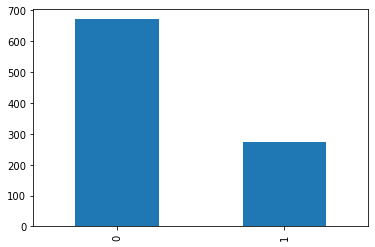

In [681]:
# 2) Extract IPS Column
# This column can also be encoded into 0 and 1 as it is binary varibale like Touchscreen
df2['Ips'] = df2['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
#how many laptops in df2 are have IPS
df2['Ips'].value_counts().plot(kind = 'bar')

Many laptops doesnt have IPS and only few laptops have IPS

<AxesSubplot:xlabel='Ips', ylabel='Price'>

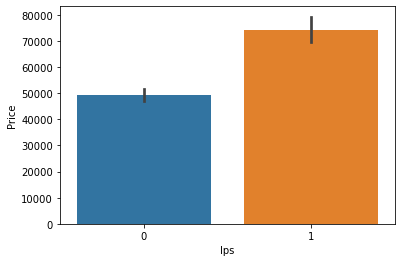

In [682]:
sns.barplot(x=df2['Ips'],y=df2['Price'])

When we plot Ips against the price we can conclude that the laptops with IPS are expensive.

## Extract X-axis and Y-axis screen resolution dimensions
Now both dimensions are present at the end of the string and are clearly divided by a cross. In order to access the last string in the list, we will first separate the string using a space. then access the zero and first index for X and Y-axis dimensions after splitting the string with a cross.

In [683]:
new = df2['ScreenResolution'].str.split('x',n=1,expand=True)

In [684]:
df2['X_res'] = new[0]
df2['Y_res'] = new[1]
df2.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_2220\2199183399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['X_res'] = new[0]
C:\Users\user\AppData\Local\Temp\ipykernel_2220\2199183399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Y_res'] = new[1]


Company   TypeName  rating  Inches                    ScreenResolution  \
0   Apple  Ultrabook     4.3    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook     4.3    13.3                            1440x900   
2      HP   Notebook     4.3    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook     3.9    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook     4.2    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

                           X_res Y_res  
0  IPS Panel Retina Display 2560  1600  
1                           1440   900  
2                   Full HD 1920  1080  
3  IPS Panel Retina Display 2880  1800  
4  IPS Panel Retina Display 2560  1600

In [685]:
df2['X_res'] = df2['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2220\1399932837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['X_res'] = df2['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


Company   TypeName  rating  Inches                    ScreenResolution  \
0   Apple  Ultrabook     4.3    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook     4.3    13.3                            1440x900   
2      HP   Notebook     4.3    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook     3.9    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook     4.2    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

  X_res Y_res  
0  2560  1600  
1  1440   900  
2  1920  1080  
3  2880  1800  
4  2560  1600

In [686]:
df2['X_res'] = df2['X_res'].astype('int')
df2['Y_res'] = df2['Y_res'].astype('int')


C:\Users\user\AppData\Local\Temp\ipykernel_2220\1100533095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['X_res'] = df2['X_res'].astype('int')
C:\Users\user\AppData\Local\Temp\ipykernel_2220\1100533095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Y_res'] = df2['Y_res'].astype('int')


## Replacing inches, X and Y resolution to PPI
Inches do not have a significant connection with price when you use the corr technique to determine the correlation of columns with price, but X and Y-axis resolution do, therefore you may use that to your advantage and combine these three columns into one column known as "pixel per inches" (PPI). In the end, we want to have less features in order to increase performance.

In [687]:
df2['ppi'] = (((df2['X_res']**2) + (df2['Y_res']**2))**0.5/df2['Inches']).astype('float')
df2.corr()['Price'].sort_values(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_2220\1142392883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ppi'] = (((df2['X_res']**2) + (df2['Y_res']**2))**0.5/df2['Inches']).astype('float')


Price          1.000000
Ram            0.690943
Y_res          0.585800
X_res          0.585523
ppi            0.541223
Ips            0.331018
Touchscreen    0.220881
Weight         0.118138
rating        -0.000417
Inches        -0.054131
Name: Price, dtype: float64

So now we can drop the extra columns which are not of use. At this point, we have started keeping the important columns in our dataset.

In [688]:
df2.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)
df2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2220\2581669124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)


Company   TypeName  rating                         Cpu  Ram  \
0   Apple  Ultrabook     4.3        Intel Core i5 2.3GHz    8   
1   Apple  Ultrabook     4.3        Intel Core i5 1.8GHz    8   
2      HP   Notebook     4.3  Intel Core i5 7200U 2.5GHz    8   
3   Apple  Ultrabook     3.9        Intel Core i7 2.7GHz   16   
4   Apple  Ultrabook     4.2        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2            256GB SSD         Intel HD Graphics 620  No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips         ppi  
0   71378.6832            0    1  226.983005  
1   47895.5232            0    0  127.677940  
2   30636.0000            0    0  141.211998  
3  135195.3360            0    1  220.534624  
4   96095.8080            0    1  226.983005

We will be doing the same to the CPU colume because it also comtains lots of information. We can see that it have 95 different categories and it gives the information about the preprocessors in laptops and speed.

In [689]:
df2['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     150
Intel Core i7 7500U 2.7GHz      97
Intel Core i7 7700HQ 2.8GHz     78
Intel Core i5 8250U 1.6GHz      66
Intel Core i7 8550U 1.8GHz      61
                              ... 
AMD A9-Series 9420 2.9GHz        1
AMD A6-Series 7310 2GHz          1
Intel Core i5 6440HQ 2.6GHz      1
Intel Core i5 6260U 1.8GHz       1
Intel Core i5 2.3GHz             1
Name: Cpu, Length: 95, dtype: int64

We must take the first three words out of the string in order to extract the preprocessor. We are maintaining five categories in our dataset for the i3, i5, i7, other intel CPUs, and AMD processors because we have an AMD and an Intel preprocessor.

In [690]:
df2['Cpu Name'] = df2['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

C:\Users\user\AppData\Local\Temp\ipykernel_2220\3356026190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cpu Name'] = df2['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))


In [691]:
df2.head()

Company   TypeName  rating                         Cpu  Ram  \
0   Apple  Ultrabook     4.3        Intel Core i5 2.3GHz    8   
1   Apple  Ultrabook     4.3        Intel Core i5 1.8GHz    8   
2      HP   Notebook     4.3  Intel Core i5 7200U 2.5GHz    8   
3   Apple  Ultrabook     3.9        Intel Core i7 2.7GHz   16   
4   Apple  Ultrabook     4.2        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2            256GB SSD         Intel HD Graphics 620  No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips         ppi       Cpu Name  
0   71378.6832            0    1  226.983005  Intel Core i5  
1   47895.5232            0    0  127.677940  Intel Core i5  
2   30636.0000            0    0  141.211998  Intel Core i5  
3  135195.3360            0    1  220.534624  Intel Core i7  
4   96095.8080            0    1  226.983005  Intel Core i5

In [692]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [693]:
df2['Cpu brand'] = df2['Cpu Name'].apply(fetch_processor)
df2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2220\2721448975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cpu brand'] = df2['Cpu Name'].apply(fetch_processor)


Company   TypeName  rating                         Cpu  Ram  \
0   Apple  Ultrabook     4.3        Intel Core i5 2.3GHz    8   
1   Apple  Ultrabook     4.3        Intel Core i5 1.8GHz    8   
2      HP   Notebook     4.3  Intel Core i5 7200U 2.5GHz    8   
3   Apple  Ultrabook     3.9        Intel Core i7 2.7GHz   16   
4   Apple  Ultrabook     4.2        Intel Core i5 3.1GHz    8   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS    1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS    1.34   
2            256GB SSD         Intel HD Graphics 620  No OS    1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS    1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS    1.37   

         Price  Touchscreen  Ips         ppi       Cpu Name      Cpu brand  
0   71378.6832            0    1  226.983005  Intel Core i5  Intel Core i5  
1   47895.5232            0    0  127.677940  Intel Core i5  Intel Core i5  
2   30636.0000            0    0  141.211998  Intel Core i5  Intel Core i5  
3  135195.3360            0    1  220.534624  Intel Core i7  Intel Core i7  
4   96095.8080            0    1  226.983005  Intel Core i5  Intel Core i5

<AxesSubplot:>

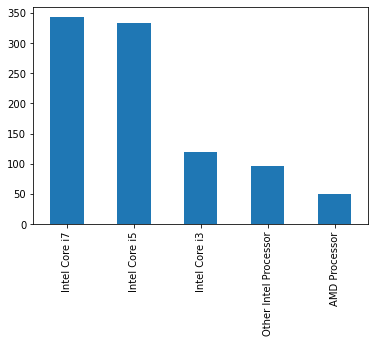

In [694]:
#Checking how many type of Cpu brands are there in df2
df2['Cpu brand'].value_counts().plot(kind='bar')

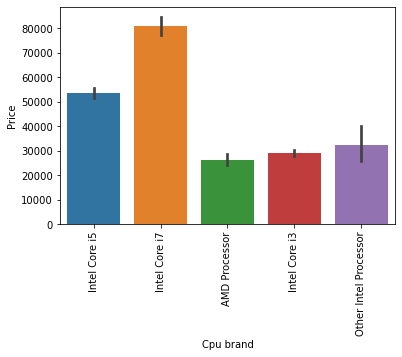

In [695]:
#checking the price for each Cpu brand
sns.barplot(x=df2['Cpu brand'],y=df2['Price'])
plt.xticks(rotation='vertical')
plt.show()

So we conclude that intel core i7 have more price

In [696]:
df2.drop(columns=['Cpu','Cpu Name'],inplace=True)
df2

C:\Users\user\AppData\Local\Temp\ipykernel_2220\4281944866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['Cpu','Cpu Name'],inplace=True)


Company            TypeName  rating  Ram               Memory  \
0      Apple           Ultrabook     4.3    8            128GB SSD   
1      Apple           Ultrabook     4.3    8  128GB Flash Storage   
2         HP            Notebook     4.3    8            256GB SSD   
3      Apple           Ultrabook     3.9   16            512GB SSD   
4      Apple           Ultrabook     4.2    8            256GB SSD   
...      ...                 ...     ...  ...                  ...   
1292    Dell            Notebook     4.2    2            500GB HDD   
1293  Lenovo            Notebook     3.9    8              1TB HDD   
1294      HP            Notebook     4.2    6         1.0TB Hybrid   
1295    Dell            Notebook     4.4    8              1TB HDD   
1299  Lenovo  2 in 1 Convertible     3.9   16            512GB SSD   

                               Gpu       OpSys  Weight        Price  \
0     Intel Iris Plus Graphics 640       macOS    1.37   71378.6832   
1           Intel HD Graphics 6000       macOS    1.34   47895.5232   
2            Intel HD Graphics 620       No OS    1.86   30636.0000   
3               AMD Radeon Pro 455       macOS    1.83  135195.3360   
4     Intel Iris Plus Graphics 650       macOS    1.37   96095.8080   
...                            ...         ...     ...          ...   
1292             Intel HD Graphics  Windows 10    2.20   20193.1200   
1293       Nvidia GeForce GTX 960M  Windows 10    2.60   47898.7200   
1294            AMD Radeon R7 M440  Windows 10    2.04   29303.4672   
1295            AMD Radeon R5 M430       Linux    2.30   42943.1472   
1299         Intel HD Graphics 520  Windows 10    1.30   79866.7200   

      Touchscreen  Ips         ppi              Cpu brand  
0               0    1  226.983005          Intel Core i5  
1               0    0  127.677940          Intel Core i5  
2               0    0  141.211998          Intel Core i5  
3               0    1  220.534624          Intel Core i7  
4               0    1  226.983005          Intel Core i5  
...           ...  ...         ...                    ...  
1292            0    0  100.454670  Other Intel Processor  
1293            0    1  141.211998          Intel Core i7  
1294            0    0  141.211998          AMD Processor  
1295            0    0  100.454670          Intel Core i7  
1299            1    1  276.053530          Intel Core i7  

[944 rows x 13 columns]

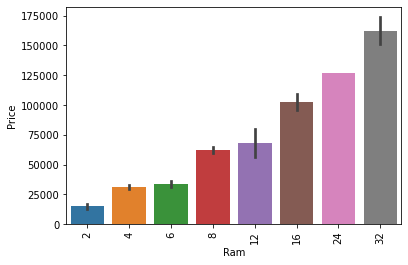

In [697]:
# Checking the price with Ram
sns.barplot(x=df2['Ram'],y=df2['Price'])
plt.xticks(rotation='vertical')
plt.show()

So we can conclude that 32 Ram have the highest price

If you use value counts on a column then we are having 4 different categories of memory as HHD, SSD, Flash storage, and hybrid.

In [698]:
df2['Memory'].value_counts()

256GB SSD                        324
1TB HDD                          181
500GB HDD                        111
512GB SSD                         79
128GB SSD                         60
128GB SSD +  1TB HDD              53
256GB SSD +  1TB HDD              22
32GB Flash Storage                19
2TB HDD                           14
1TB SSD                           10
256GB Flash Storage                8
64GB Flash Storage                 8
1.0TB Hybrid                       8
512GB SSD +  1TB HDD               7
256GB SSD +  2TB HDD               7
180GB SSD                          5
16GB Flash Storage                 5
128GB Flash Storage                4
16GB SSD                           3
512GB Flash Storage                2
128GB SSD +  2TB HDD               2
1.0TB HDD                          1
256GB SSD +  500GB HDD             1
508GB Hybrid                       1
8GB SSD                            1
240GB SSD                          1
32GB SSD                           1
1

In [699]:
#preprocessing
df2['Memory'] = df2['Memory'].astype(str).replace('\.0', '', regex=True)
df2["Memory"] = df2["Memory"].str.replace('GB', '')
df2["Memory"] = df2["Memory"].str.replace('TB', '000')
new = df2["Memory"].str.split("+", n = 1, expand = True)

df2["first"]= new[0]
df2["first"]=df2["first"].str.strip()

df2["second"]= new[1]

df2["Layer1HDD"] = df2["first"].apply(lambda x: 1 if "HDD" in x else 0)
df2["Layer1SSD"] = df2["first"].apply(lambda x: 1 if "SSD" in x else 0)
df2["Layer1Hybrid"] = df2["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df2["Layer1Flash_Storage"] = df2["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df2['first'] = df2['first'].str.replace(r'\D', '')

df2["second"].fillna("0", inplace = True)

df2["Layer2HDD"] = df2["second"].apply(lambda x: 1 if "HDD" in x else 0)
df2["Layer2SSD"] = df2["second"].apply(lambda x: 1 if "SSD" in x else 0)
df2["Layer2Hybrid"] = df2["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df2["Layer2Flash_Storage"] = df2["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df2['second'] = df2['second'].str.replace(r'\D', '')

df2["first"] = pd.to_numeric(df2["first"])
df2["second"] = pd.to_numeric(df2["second"])

df2["HDD"]=(df2["first"]*df2["Layer1HDD"]+df2["second"]*df2["Layer2HDD"])
df2["SSD"]=(df2["first"]*df2["Layer1SSD"]+df2["second"]*df2["Layer2SSD"])
df2["Hybrid"]=(df2["first"]*df2["Layer1Hybrid"]+df2["second"]*df2["Layer2Hybrid"])
df2["Flash_Storage"]=(df2["first"]*df2["Layer1Flash_Storage"]+df2["second"]*df2["Layer2Flash_Storage"])

df2.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2220\3912631572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Memory'] = df2['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2220\3912631572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Memory"] = df2["Memory"].str.replace('GB', '')
C:\Users\user\AppData\Local\Temp\ipykernel_2220\3912631572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [700]:
df2.sample(5)

Company   TypeName  rating  Ram    Memory                       Gpu  \
466     Acer   Notebook     4.3    4   500 HDD  Nvidia GeForce GTX 940MX   
207     Dell  Ultrabook     3.8    8   256 SSD    Intel UHD Graphics 620   
485   Lenovo   Notebook     4.3    8   256 SSD    Intel UHD Graphics 620   
434   Lenovo   Notebook     4.3   16   512 SSD      Nvidia Quadro M2200M   
1217  Lenovo   Notebook     4.1    8  1000 HDD     Intel HD Graphics 620   

           OpSys  Weight      Price  Touchscreen  Ips         ppi  \
466   Windows 10    2.20   24988.32            0    0  100.454670   
207   Windows 10    1.21  103842.72            1    1  331.264236   
485   Windows 10    1.75   55890.72            0    1  157.350512   
434   Windows 10    2.50  130482.72            0    0  141.211998   
1217       No OS    2.80   28717.92            0    0  106.113062   

          Cpu brand   HDD  SSD  Hybrid  Flash_Storage  
466   Intel Core i3   500    0       0              0  
207   Intel Core i7     0  256       0              0  
485   Intel Core i5     0  256       0              0  
434   Intel Core i7     0  512       0              0  
1217  Intel Core i5  1000    0       0              0

In [701]:
df2.dtypes

Company           object
TypeName          object
rating           float64
Ram                int32
Memory            object
Gpu               object
OpSys             object
Weight           float32
Price            float64
Touchscreen        int64
Ips                int64
ppi              float64
Cpu brand         object
HDD                int64
SSD                int64
Hybrid             int64
Flash_Storage      int64
dtype: object

In [702]:
df2.drop(columns=['Memory'],inplace=True)
df2

C:\Users\user\AppData\Local\Temp\ipykernel_2220\1101917889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['Memory'],inplace=True)


Company            TypeName  rating  Ram                           Gpu  \
0      Apple           Ultrabook     4.3    8  Intel Iris Plus Graphics 640   
1      Apple           Ultrabook     4.3    8        Intel HD Graphics 6000   
2         HP            Notebook     4.3    8         Intel HD Graphics 620   
3      Apple           Ultrabook     3.9   16            AMD Radeon Pro 455   
4      Apple           Ultrabook     4.2    8  Intel Iris Plus Graphics 650   
...      ...                 ...     ...  ...                           ...   
1292    Dell            Notebook     4.2    2             Intel HD Graphics   
1293  Lenovo            Notebook     3.9    8       Nvidia GeForce GTX 960M   
1294      HP            Notebook     4.2    6            AMD Radeon R7 M440   
1295    Dell            Notebook     4.4    8            AMD Radeon R5 M430   
1299  Lenovo  2 in 1 Convertible     3.9   16         Intel HD Graphics 520   

           OpSys  Weight        Price  Touchscreen  Ips         ppi  \
0          macOS    1.37   71378.6832            0    1  226.983005   
1          macOS    1.34   47895.5232            0    0  127.677940   
2          No OS    1.86   30636.0000            0    0  141.211998   
3          macOS    1.83  135195.3360            0    1  220.534624   
4          macOS    1.37   96095.8080            0    1  226.983005   
...          ...     ...          ...          ...  ...         ...   
1292  Windows 10    2.20   20193.1200            0    0  100.454670   
1293  Windows 10    2.60   47898.7200            0    1  141.211998   
1294  Windows 10    2.04   29303.4672            0    0  141.211998   
1295       Linux    2.30   42943.1472            0    0  100.454670   
1299  Windows 10    1.30   79866.7200            1    1  276.053530   

                  Cpu brand   HDD  SSD  Hybrid  Flash_Storage  
0             Intel Core i5     0  128       0              0  
1             Intel Core i5     0    0       0            128  
2             Intel Core i5     0  256       0              0  
3             Intel Core i7     0  512       0              0  
4             Intel Core i5     0  256       0              0  
...                     ...   ...  ...     ...            ...  
1292  Other Intel Processor   500    0       0              0  
1293          Intel Core i7  1000    0       0              0  
1294          AMD Processor     0    0    1000              0  
1295          Intel Core i7  1000    0       0              0  
1299          Intel Core i7     0  512       0              0  

[944 rows x 16 columns]

In [703]:
df2.corr()['Price']

rating          -0.000417
Ram              0.690943
Weight           0.118138
Price            1.000000
Touchscreen      0.220881
Ips              0.331018
ppi              0.541223
HDD             -0.201724
SSD              0.635894
Hybrid          -0.003336
Flash_Storage    0.000432
Name: Price, dtype: float64

## NOTE: Even though the correlation of rating with price is low we didnt drop this column because we need it for other part of our analysis listed in our aims

In [704]:
df2.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2220\3202502012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['Hybrid','Flash_Storage'],inplace=True)


Company   TypeName  rating  Ram                           Gpu  OpSys  \
0   Apple  Ultrabook     4.3    8  Intel Iris Plus Graphics 640  macOS   
1   Apple  Ultrabook     4.3    8        Intel HD Graphics 6000  macOS   
2      HP   Notebook     4.3    8         Intel HD Graphics 620  No OS   
3   Apple  Ultrabook     3.9   16            AMD Radeon Pro 455  macOS   
4   Apple  Ultrabook     4.2    8  Intel Iris Plus Graphics 650  macOS   

   Weight        Price  Touchscreen  Ips         ppi      Cpu brand  HDD  SSD  
0    1.37   71378.6832            0    1  226.983005  Intel Core i5    0  128  
1    1.34   47895.5232            0    0  127.677940  Intel Core i5    0    0  
2    1.86   30636.0000            0    0  141.211998  Intel Core i5    0  256  
3    1.83  135195.3360            0    1  220.534624  Intel Core i7    0  512  
4    1.37   96095.8080            0    1  226.983005  Intel Core i5    0  256

Data categories on the GPU (Graphical Processing Unit) are numerous. We are asking about the laptop's graphic card manufacturer. We don't know how many capacities, such as 6GB or 12GB, the graphic card has. Therefore, we will only take the brand name.

In [705]:
df2['Gpu'].value_counts()

Intel HD Graphics 620       213
Intel HD Graphics 520       150
Intel UHD Graphics 620       61
AMD Radeon 530               41
Nvidia GeForce GTX 1050      39
                           ... 
Intel Iris Pro Graphics       1
AMD Radeon R7                 1
Intel HD Graphics 540         1
Nvidia GeForce GTX 1070M      1
Nvidia GeForce 960M           1
Name: Gpu, Length: 96, dtype: int64

In [706]:
df2['Gpu brand'] = df2['Gpu'].apply(lambda x:x.split()[0])
df2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2220\3730248319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gpu brand'] = df2['Gpu'].apply(lambda x:x.split()[0])


Company   TypeName  rating  Ram                           Gpu  OpSys  \
0   Apple  Ultrabook     4.3    8  Intel Iris Plus Graphics 640  macOS   
1   Apple  Ultrabook     4.3    8        Intel HD Graphics 6000  macOS   
2      HP   Notebook     4.3    8         Intel HD Graphics 620  No OS   
3   Apple  Ultrabook     3.9   16            AMD Radeon Pro 455  macOS   
4   Apple  Ultrabook     4.2    8  Intel Iris Plus Graphics 650  macOS   

   Weight        Price  Touchscreen  Ips         ppi      Cpu brand  HDD  SSD  \
0    1.37   71378.6832            0    1  226.983005  Intel Core i5    0  128   
1    1.34   47895.5232            0    0  127.677940  Intel Core i5    0    0   
2    1.86   30636.0000            0    0  141.211998  Intel Core i5    0  256   
3    1.83  135195.3360            0    1  220.534624  Intel Core i7    0  512   
4    1.37   96095.8080            0    1  226.983005  Intel Core i5    0  256   

  Gpu brand  
0     Intel  
1     Intel  
2     Intel  
3       AMD  
4     Intel

In [707]:
df2['Gpu brand'].value_counts()

Intel     550
Nvidia    229
AMD       165
Name: Gpu brand, dtype: int64

In [708]:
df2 = df2[df2['Gpu brand'] != 'ARM']
df2['Gpu brand'].value_counts()

Intel     550
Nvidia    229
AMD       165
Name: Gpu brand, dtype: int64

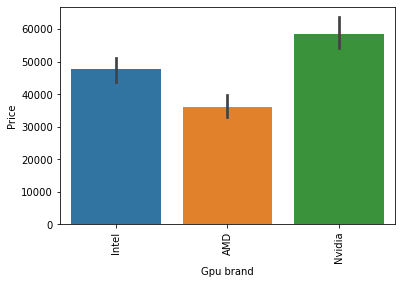

In [709]:
sns.barplot(x=df2['Gpu brand'],y=df2['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [710]:
df2.drop(columns=['Gpu'],inplace=True)
df2

Company            TypeName  rating  Ram       OpSys  Weight  \
0      Apple           Ultrabook     4.3    8       macOS    1.37   
1      Apple           Ultrabook     4.3    8       macOS    1.34   
2         HP            Notebook     4.3    8       No OS    1.86   
3      Apple           Ultrabook     3.9   16       macOS    1.83   
4      Apple           Ultrabook     4.2    8       macOS    1.37   
...      ...                 ...     ...  ...         ...     ...   
1292    Dell            Notebook     4.2    2  Windows 10    2.20   
1293  Lenovo            Notebook     3.9    8  Windows 10    2.60   
1294      HP            Notebook     4.2    6  Windows 10    2.04   
1295    Dell            Notebook     4.4    8       Linux    2.30   
1299  Lenovo  2 in 1 Convertible     3.9   16  Windows 10    1.30   

            Price  Touchscreen  Ips         ppi              Cpu brand   HDD  \
0      71378.6832            0    1  226.983005          Intel Core i5     0   
1      47895.5232            0    0  127.677940          Intel Core i5     0   
2      30636.0000            0    0  141.211998          Intel Core i5     0   
3     135195.3360            0    1  220.534624          Intel Core i7     0   
4      96095.8080            0    1  226.983005          Intel Core i5     0   
...           ...          ...  ...         ...                    ...   ...   
1292   20193.1200            0    0  100.454670  Other Intel Processor   500   
1293   47898.7200            0    1  141.211998          Intel Core i7  1000   
1294   29303.4672            0    0  141.211998          AMD Processor     0   
1295   42943.1472            0    0  100.454670          Intel Core i7  1000   
1299   79866.7200            1    1  276.053530          Intel Core i7     0   

      SSD Gpu brand  
0     128     Intel  
1       0     Intel  
2     256     Intel  
3     512       AMD  
4     256     Intel  
...   ...       ...  
1292    0     Intel  
1293    0    Nvidia  
1294    0       AMD  
1295    0       AMD  
1299  512     Intel  

[944 rows x 14 columns]

Operating systems can be divided into numerous categories. All Windows categories will remain in one, Mac categories in one, and the rest in other categories. This is the easiest and most popular feature engineering technique; if you discover a stronger association with pricing, try something else.

In [711]:
df2['OpSys'].value_counts()

Windows 10    757
No OS          56
Linux          51
Windows 7      40
Chrome OS      18
macOS          12
Mac OS X        8
Android         2
Name: OpSys, dtype: int64

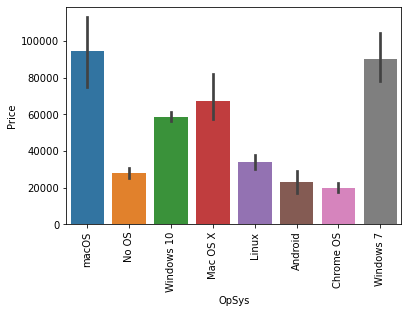

In [712]:
sns.barplot(x=df2['OpSys'],y=df2['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [713]:
#Get which OP sys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df2['os'] = df2['OpSys'].apply(cat_os)
df2.drop(columns=['OpSys'],inplace=True)
df2.head()

Company   TypeName  rating  Ram  Weight        Price  Touchscreen  Ips  \
0   Apple  Ultrabook     4.3    8    1.37   71378.6832            0    1   
1   Apple  Ultrabook     4.3    8    1.34   47895.5232            0    0   
2      HP   Notebook     4.3    8    1.86   30636.0000            0    0   
3   Apple  Ultrabook     3.9   16    1.83  135195.3360            0    1   
4   Apple  Ultrabook     4.2    8    1.37   96095.8080            0    1   

          ppi      Cpu brand  HDD  SSD Gpu brand                  os  
0  226.983005  Intel Core i5    0  128     Intel                 Mac  
1  127.677940  Intel Core i5    0    0     Intel                 Mac  
2  141.211998  Intel Core i5    0  256     Intel  Others/No OS/Linux  
3  220.534624  Intel Core i7    0  512       AMD                 Mac  
4  226.983005  Intel Core i5    0  256     Intel                 Mac

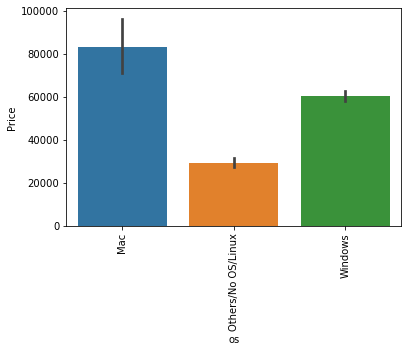

In [714]:
sns.barplot(x=df2['os'],y=df2['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

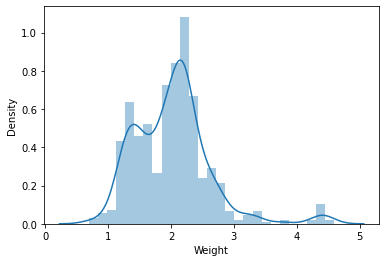

In [715]:
sns.distplot(df2['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

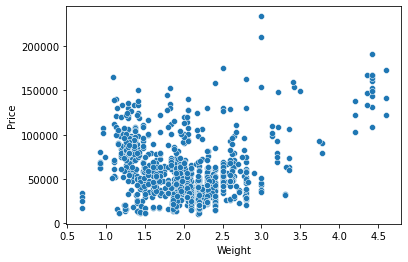

In [716]:
sns.scatterplot(x=df2['Weight'],y=df2['Price'])

In [717]:
df2.corr()['Price']

rating        -0.000417
Ram            0.690943
Weight         0.118138
Price          1.000000
Touchscreen    0.220881
Ips            0.331018
ppi            0.541223
HDD           -0.201724
SSD            0.635894
Name: Price, dtype: float64

The target variable's distribution, which was right-skewed, was seen above. The algorithm's performance will improve by changing it to a normal distribution. We calculate the log of values that satisfy the normal distribution, as shown below. So, after separating the dependent and independent variables, we will take the price log and use its exponent when reporting the result.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


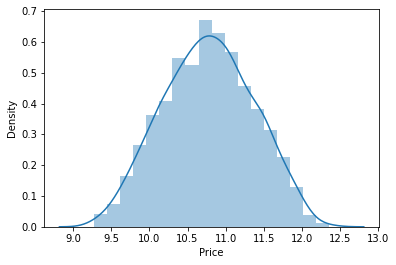

In [718]:
sns.distplot(np.log(df2['Price']))
plt.show()

## Machine Learning Modeling for Laptop Price Prediction

#### Working with differences algorithms

In [719]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder ,OrdinalEncoder

### Split in train and test test

In [720]:
X = df2.drop(columns=['Price'])

y = np.log(df2['Price'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [721]:
X.head()

Company   TypeName  rating  Ram  Weight  Touchscreen  Ips         ppi  \
0   Apple  Ultrabook     4.3    8    1.37            0    1  226.983005   
1   Apple  Ultrabook     4.3    8    1.34            0    0  127.677940   
2      HP   Notebook     4.3    8    1.86            0    0  141.211998   
3   Apple  Ultrabook     3.9   16    1.83            0    1  220.534624   
4   Apple  Ultrabook     4.2    8    1.37            0    1  226.983005   

       Cpu brand  HDD  SSD Gpu brand                  os  
0  Intel Core i5    0  128     Intel                 Mac  
1  Intel Core i5    0    0     Intel                 Mac  
2  Intel Core i5    0  256     Intel  Others/No OS/Linux  
3  Intel Core i7    0  512       AMD                 Mac  
4  Intel Core i5    0  256     Intel                 Mac

#### Implement Pipeline for training and testing
We will now put in place a pipeline to speed up the training and testing procedure. Step one involves encoding categorical variables using a column transformer. We then make an object representing our algorithm and send both operations to the pipeline. We forecast the score on fresh data using pipeline objects, and we show the precision.

In [722]:
#selecting numerical columns
numeric_cols =X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

Index(['rating', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD'], dtype='object')


In [723]:
ordinal_cols = X[['Cpu brand']].columns
print(ordinal_cols)

Index(['Cpu brand'], dtype='object')


In [724]:
nominal_cols = X[['Gpu brand' ,'os','TypeName','Company']].columns
print(nominal_cols)

Index(['Gpu brand', 'os', 'TypeName', 'Company'], dtype='object')


In [725]:
#Building the Numeric Transformation Pipeline
n_transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',MinMaxScaler())
                       ])

In [726]:
 #Building the nominalTransformation Pipeline
nominal_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot',OneHotEncoder(handle_unknown='ignore'))
                       ])

In [727]:
ordinal_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('ordinal',OrdinalEncoder(handle_unknown='error'))
                       ])

In [728]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=
                                 [
                                     ('num',n_transformer,numeric_cols),
                                     ('ordinal',ordinal_transformer,ordinal_cols),
                                     ('nominal',nominal_transformer,nominal_cols)
                                 ]
                                 )

### 1/ Linear regression

In [729]:
LRestimator = LinearRegression()


In [730]:
LRmodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',LRestimator)
                  ])

In [731]:
from sklearn import set_config
set_config(display='diagram')
LRmodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['rating', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Cpu brand'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gpu brand', 'os', 'TypeName', 'Company'], dtype='object'))])),
                ('est', LinearRegression())])

In [732]:
y_hat = LRmodel.predict(X_test)

In [733]:
LRmodel.score(X_train,y_train)

0.6960141715980717

In [734]:
LRmodel.score(X_test,y_test)

0.6554970707523923

In [735]:
r2_score(y_test,y_hat)

0.6554970707523923

In [736]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_hat)

0.1293826553587643

In [737]:
mean_absolute_error(y_test,y_hat)

0.27908253743506056

### 2/ KNN

In [738]:
KNNestimator = KNeighborsRegressor(n_neighbors=3)

In [739]:
KNNmodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',KNNestimator)
                  ])

In [740]:
set_config(display='diagram')
KNNmodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['rating', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Cpu brand'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gpu brand', 'os', 'TypeName', 'Company'], dtype='object'))])),
                ('est', KNeighborsRegressor(n_neighbors=3))])

In [741]:
y_hat1 = KNNmodel.predict(X_test)

In [742]:
KNNmodel.score(X_train,y_train)

0.8778446269895626

In [743]:
KNNmodel.score(X_test,y_test)

0.7417402888852056

In [744]:
r2_score(y_test,y_hat1)

0.7417402888852056

In [745]:
mean_squared_error(y_test,y_hat1)

0.09699286815701728

In [746]:
mean_absolute_error(y_test,y_hat1)

0.2301008100070705

### 3/ Decision Tree

In [747]:
DTestimator  = DecisionTreeRegressor(max_depth=8)

In [748]:
DTmodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',DTestimator)
                  ])

In [749]:
set_config(display='diagram')
DTmodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['rating', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Cpu brand'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gpu brand', 'os', 'TypeName', 'Company'], dtype='object'))])),
                ('est', DecisionTreeRegressor(max_depth=8))])

In [750]:
y_hat2 = DTmodel.predict(X_test)

In [751]:
DTmodel.score(X_train,y_train)

0.8935060725534023

In [752]:
DTmodel.score(X_test,y_test)

0.7787699110303348

In [753]:
r2_score(y_test,y_hat2)

0.7787699110303348

In [754]:
mean_squared_error(y_test,y_hat2)

0.08308590123940064

In [755]:
mean_absolute_error(y_test,y_hat2)

0.2203704982918499

### 4/Lasso Regression 

In [756]:
Lestimator = Lasso(alpha=0.001)

In [757]:
Lmodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',Lestimator)
                  ])

In [758]:
set_config(display='diagram')
Lmodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['rating', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Cpu brand'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gpu brand', 'os', 'TypeName', 'Company'], dtype='object'))])),
                ('est', Lasso(alpha=0.001))])

In [759]:
y_hat3 = Lmodel.predict(X_test)

In [760]:
Lmodel.score(X_train,y_train)

0.6945354062100799

In [761]:
Lmodel.score(X_test,y_test)

0.6613769855774877

In [762]:
r2_score(y_test,y_hat3)

0.6613769855774877

In [763]:
mean_squared_error(y_test,y_hat3)

0.12717437517079694

In [764]:
mean_absolute_error(y_test,y_hat3)

0.27768313650868554

For our model <b>decision tree algorithm</b> gives highest accuracy

In [765]:
import pickle 
pickle.dump(DTmodel,open('laptopPricePredictionmodel.pkl','wb'))

In [766]:
laptopmodel = pickle.load(open('laptopPricePredictionmodel.pkl','rb'))

In [767]:
laptopmodel.score(X_test,y_test)

0.7787699110303348